In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PRP

In [31]:
data = pd.read_csv(r"C:\Users\CTTC1\Downloads\machine (1).data",header=None)

In [32]:
data

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [33]:
data.columns = ['vendor_name','model_name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
data

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [34]:
data.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [35]:
for i in data.columns:
    print(i,'\n',data[i].unique(),'\n')

vendor_name 
 ['adviser' 'amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cdc'
 'cambex' 'dec' 'dg' 'formation' 'four-phase' 'gould' 'hp' 'harris'
 'honeywell' 'ibm' 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf'
 'perkin-elmer' 'prime' 'siemens' 'sperry' 'sratus' 'wang'] 

model_name 
 ['32/60' '470v/7' '470v/7a' '470v/7b' '470v/7c' '470v/b' '580-5840'
 '580-5850' '580-5860' '580-5880' 'dn320' 'dn420' '7/65' '7/68' '5000'
 '8000' 'b1955' 'b2900' 'b2925' 'b4955' 'b5900' 'b5920' 'b6900' 'b6925'
 '68/10-80' 'universe:2203t' 'universe:68' 'universe:68/05'
 'universe:68/137' 'universe:68/37' 'cyber:170/750' 'cyber:170/760'
 'cyber:170/815' 'cyber:170/825' 'cyber:170/835' 'cyber:170/845'
 'omega:480-i' 'omega:480-ii' 'omega:480-iii' '1636-1' '1636-10' '1641-1'
 '1641-11' '1651-1' 'decsys:10:1091' 'decsys:20:2060' 'microvax-1'
 'vax:11/730' 'vax:11/750' 'vax:11/780' 'eclipse:c/350' 'eclipse:m/600'
 'eclipse:mv/10000' 'eclipse:mv/4000' 'eclipse:mv/6000' 'eclipse:mv/8000'
 'eclipse:mv/8

In [36]:
data = data.drop('vendor_name',axis=1)
data

,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,32/60,125,256,6000,256,16,128,198,199
1,470v/7,29,8000,32000,32,8,32,269,253
2,470v/7a,29,8000,32000,32,8,32,220,253
3,470v/7b,29,8000,32000,32,8,32,172,253
4,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,80/8,124,1000,8000,0,1,8,42,37
205,90/80-model-3,98,1000,8000,32,2,8,46,50
206,32,125,2000,8000,0,2,14,52,41
207,vs-100,480,512,8000,32,0,0,67,47


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['model_name'] = le.fit_transform(data['model_name'])
data['model_name'].unique()

array([ 29,  62,  63,  64,  65,  66,  74,  75,  76,  77, 148, 149,  92,
        93,  73, 102, 129, 130, 131, 132, 133, 134, 135, 136,  79, 186,
       187, 188, 189, 190, 140, 141, 142, 143, 144, 145, 182, 183, 184,
         8,   9,  10,  11,  12, 146, 147, 181, 204, 205, 206, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174,  13, 137, 138,
       139,  15,  16,  17,  18,  19,  20,  21,   0,  14,  72,  78,  94,
        95, 101, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161,
       162, 157,  22,  23,  24,  25,  26,  27,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55, 103, 104, 105,  56,  57,  58,  59,  60,
        61, 175, 176, 177, 178, 179, 180, 185, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 106, 107, 108,  30,  31,  32,  67,  68,  69,  70,  7

In [38]:
data['model_name'].nunique()

209

In [39]:
data = data.drop('ERP',axis=1)
data

,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,29,125,256,6000,256,16,128,198
1,62,29,8000,32000,32,8,32,269
2,63,29,8000,32000,32,8,32,220
3,64,29,8000,32000,32,8,32,172
4,65,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...
204,100,124,1000,8000,0,1,8,42
205,109,98,1000,8000,32,2,8,46
206,28,125,2000,8000,0,2,14,52
207,207,480,512,8000,32,0,0,67


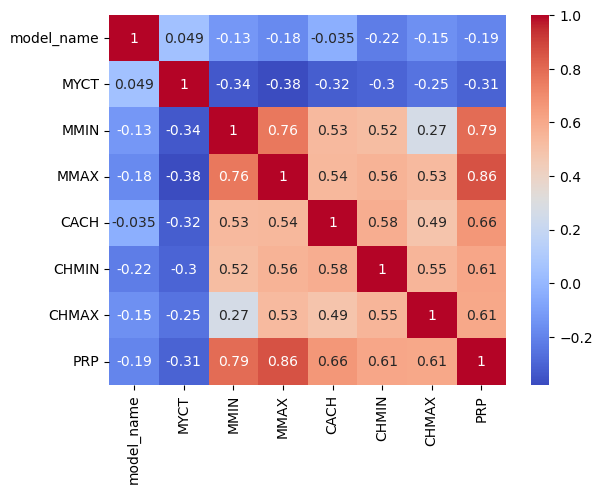

In [40]:
cor = data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

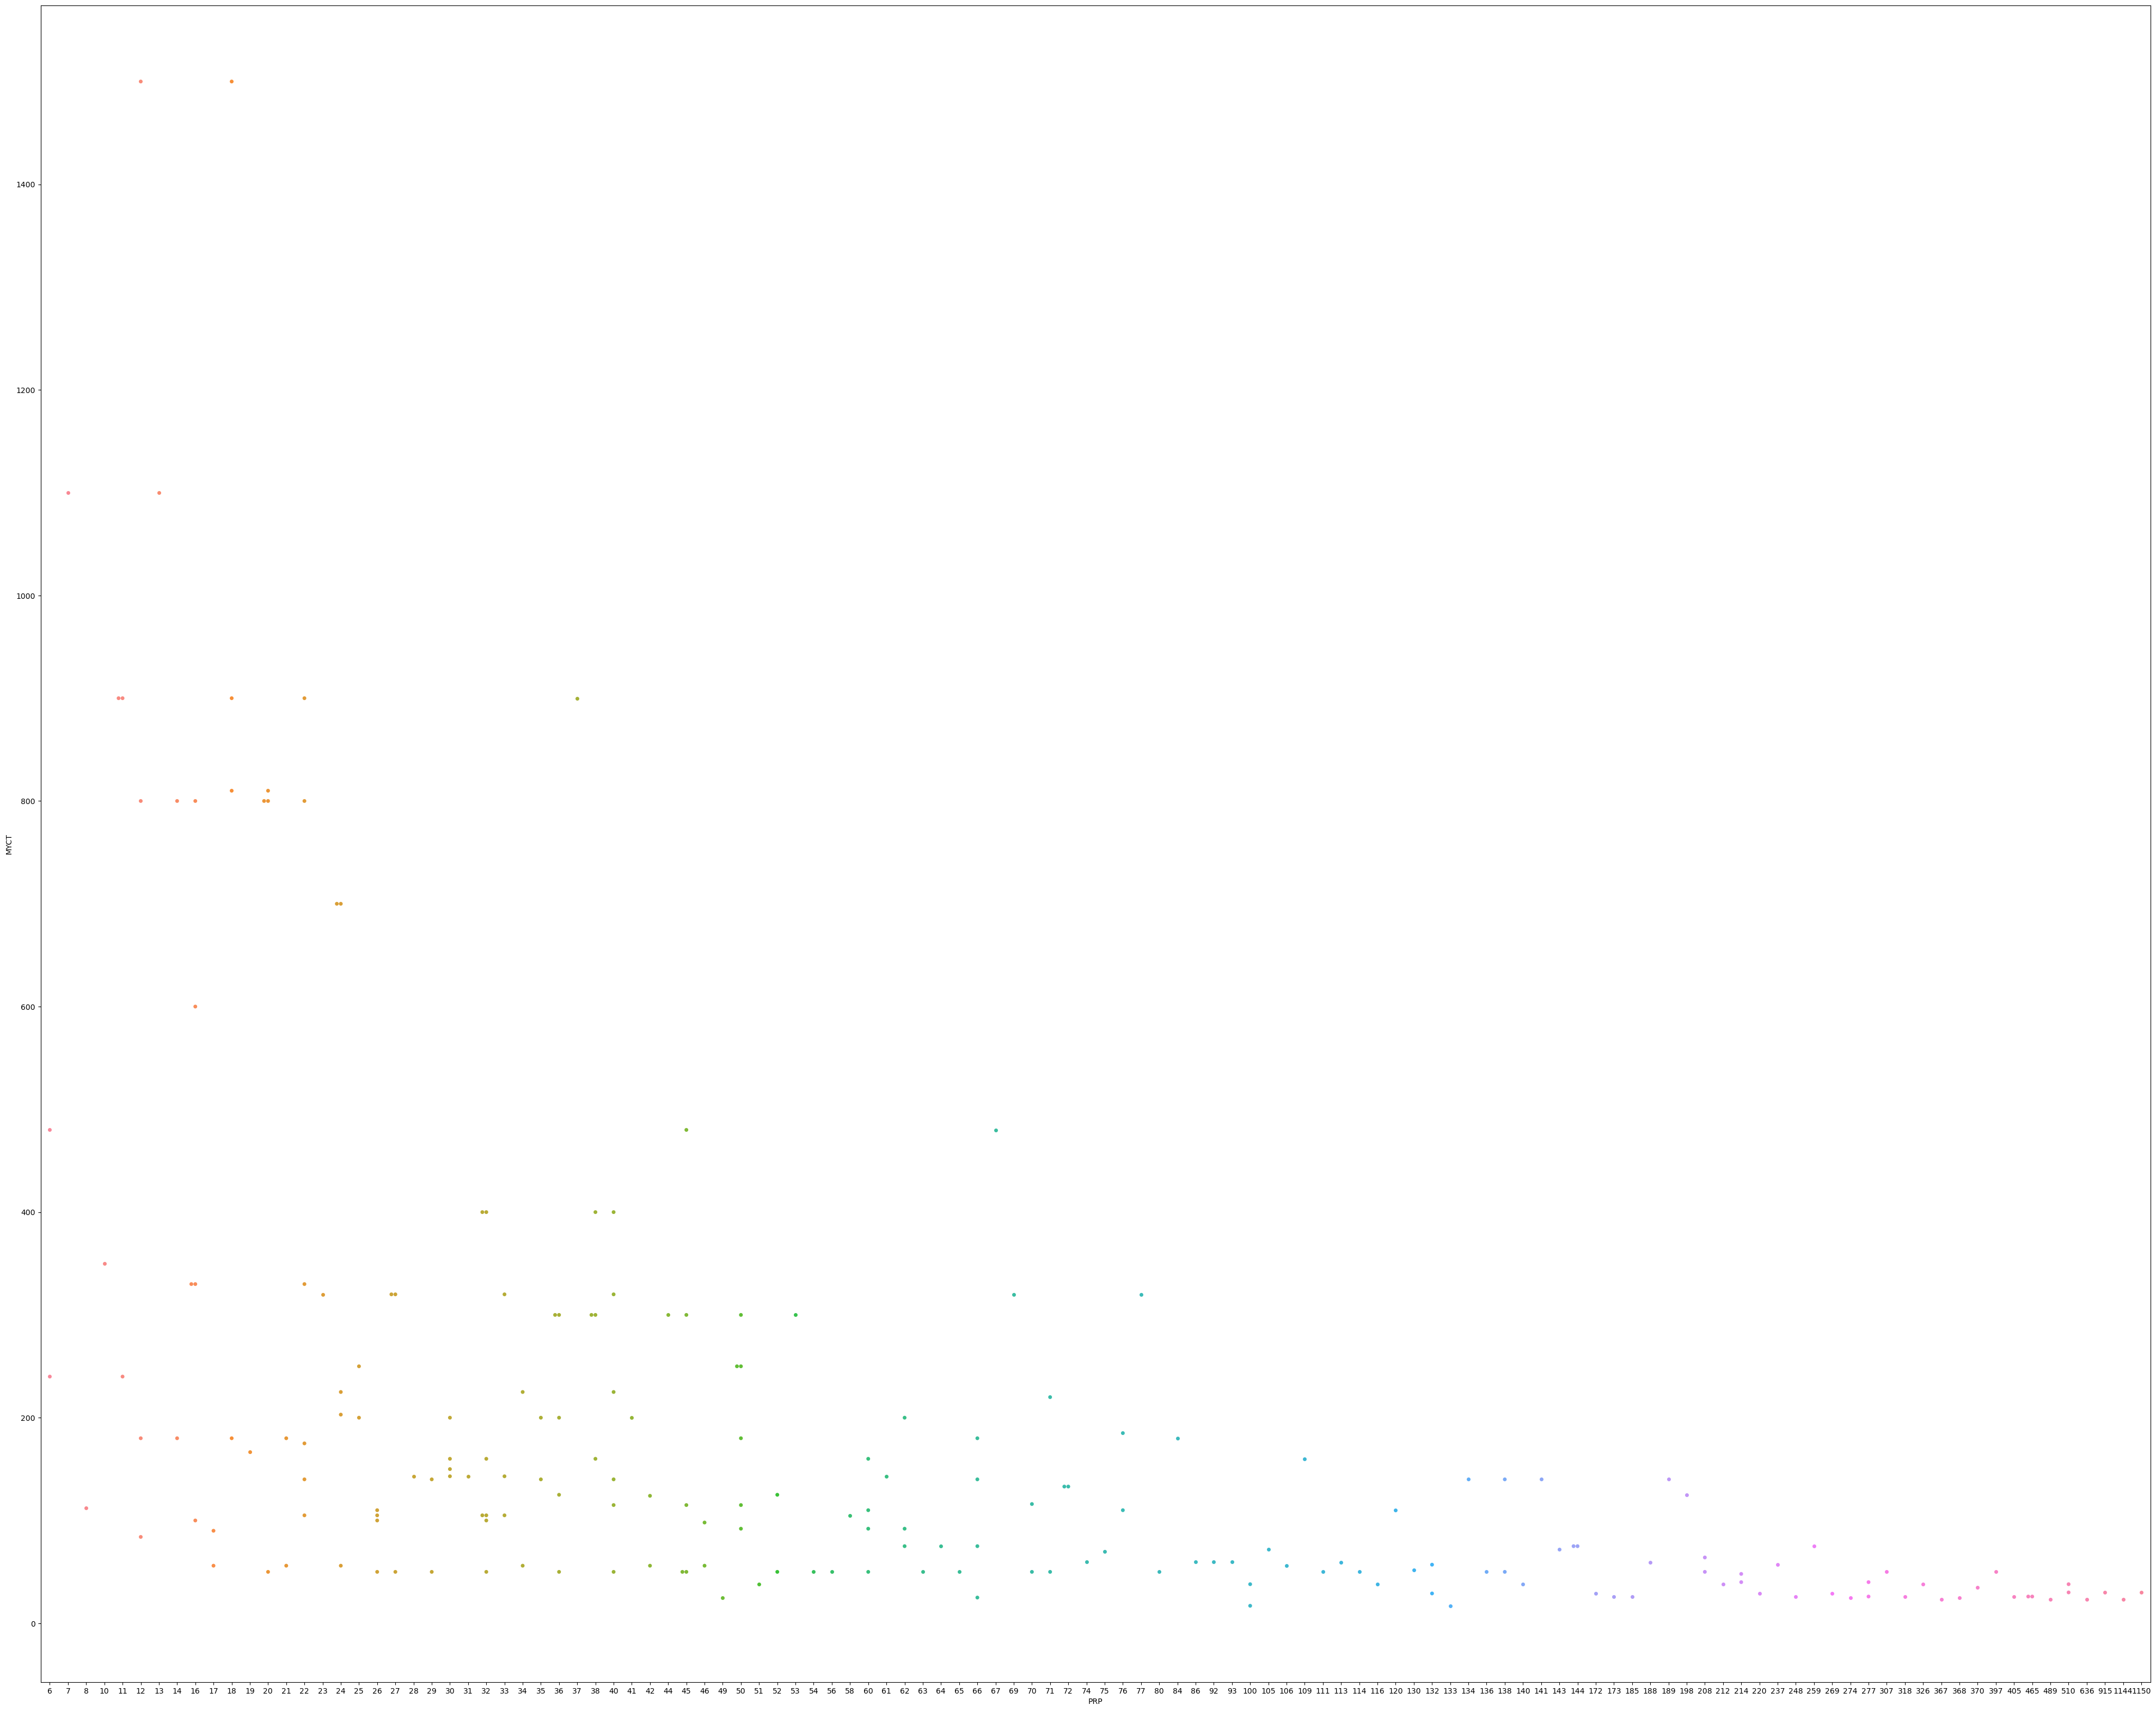

In [41]:
plt.figure(figsize=(50,40))
sns.swarmplot(x=data.PRP,y=data.MYCT,data=data)
plt.show()

In [42]:
#ip/op creation

ip = data.drop(['PRP','model_name'],axis=1)
op = data.PRP

In [43]:
ip.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [44]:
op.head()

0    198
1    269
2    220
3    172
4    132
Name: PRP, dtype: int64

In [47]:
maxr2=0
maxi=0
for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.3,random_state=i)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)    
    x_test = sc.fit_transform(x_test)
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    yp = lr.predict(x_test)
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    b = mean_squared_error(y_test,yp)
    c = r2_score(y_test,yp)
    print("\nFor",i,"Random state")
    print("The MSE:",b)
    print("The R2 score:",c)
    if c>maxr2:
        maxr2=c
        maxi=i
print('\n\nThe maximum r2 score is at',maxi,'random state with an r2 score of:',maxr2)


For 1 Random state
The MSE: 8337.456286919103
The R2 score: 0.2351303707391037

For 2 Random state
The MSE: 3628.0540776014955
The R2 score: 0.8706873342894108

For 3 Random state
The MSE: 8520.547706260588
The R2 score: 0.7019912391824986

For 4 Random state
The MSE: 13691.11647499101
The R2 score: 0.6213049380834091

For 5 Random state
The MSE: 6288.429900751137
The R2 score: 0.8066858382662515

For 6 Random state
The MSE: 6970.62241450359
The R2 score: 0.1471145302882867

For 7 Random state
The MSE: 7851.7917682161915
The R2 score: 0.7618591553777889

For 8 Random state
The MSE: 5605.411810132424
The R2 score: 0.5263344106881833

For 9 Random state
The MSE: 8671.810502249547
The R2 score: 0.7724162649466086

For 10 Random state
The MSE: 5008.6528535795505
The R2 score: 0.8247991868311084

For 11 Random state
The MSE: 6816.9522107558905
The R2 score: 0.3683397211571754

For 12 Random state
The MSE: 6362.542471335576
The R2 score: 0.7955492963402478

For 13 Random state
The MSE: 3813

# ERP


In [48]:
data = pd.read_csv(r"C:\Users\CTTC1\Downloads\machine (1).data",header=None)
data

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [49]:
data.columns = ['vendor_name','model_name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
data

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [50]:
data = data.drop(['vendor_name','PRP'],axis=1)
data

,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,32/60,125,256,6000,256,16,128,199
1,470v/7,29,8000,32000,32,8,32,253
2,470v/7a,29,8000,32000,32,8,32,253
3,470v/7b,29,8000,32000,32,8,32,253
4,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...
204,80/8,124,1000,8000,0,1,8,37
205,90/80-model-3,98,1000,8000,32,2,8,50
206,32,125,2000,8000,0,2,14,41
207,vs-100,480,512,8000,32,0,0,47


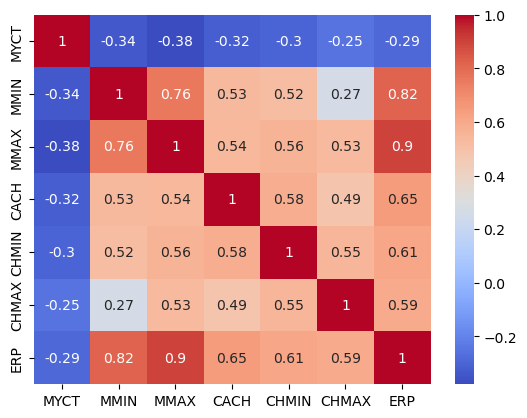

In [51]:
cor = data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['model_name'] = le.fit_transform(data['model_name'])
data['model_name'].unique()

array([ 29,  62,  63,  64,  65,  66,  74,  75,  76,  77, 148, 149,  92,
        93,  73, 102, 129, 130, 131, 132, 133, 134, 135, 136,  79, 186,
       187, 188, 189, 190, 140, 141, 142, 143, 144, 145, 182, 183, 184,
         8,   9,  10,  11,  12, 146, 147, 181, 204, 205, 206, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174,  13, 137, 138,
       139,  15,  16,  17,  18,  19,  20,  21,   0,  14,  72,  78,  94,
        95, 101, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161,
       162, 157,  22,  23,  24,  25,  26,  27,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55, 103, 104, 105,  56,  57,  58,  59,  60,
        61, 175, 176, 177, 178, 179, 180, 185, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 106, 107, 108,  30,  31,  32,  67,  68,  69,  70,  7

In [53]:
#ip/op creation

ip=data.drop(['model_name','ERP'],axis=1)
op=data.ERP

In [54]:
ip.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16


In [55]:
op.head()

0    199
1    253
2    253
3    253
4    132
Name: ERP, dtype: int64

In [56]:
maxr2=0
maxi=0
for i in range(1,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.3,random_state=i)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)    
    x_test = sc.fit_transform(x_test)
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    yp = lr.predict(x_test)
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    b = mean_squared_error(y_test,yp)
    c = r2_score(y_test,yp)
    print("\nFor",i,"Random state")
    print("The MSE:",b)
    print("The R2 score:",c)
    if c>maxr2:
        maxr2=c
        maxi=i
print('\n\nThe maximum r2 score is at',maxi,'random state with an r2 score of:',maxr2)


For 1 Random state
The MSE: 8913.369143431864
The R2 score: -0.34763426379672446

For 2 Random state
The MSE: 5385.33314645313
The R2 score: 0.8335079083146324

For 3 Random state
The MSE: 2829.714371548465
The R2 score: 0.8783265403799111

For 4 Random state
The MSE: 8927.786319713208
The R2 score: 0.7096725078202835

For 5 Random state
The MSE: 3139.9869540584828
The R2 score: 0.8809460748468727

For 6 Random state
The MSE: 5813.710800733077
The R2 score: 0.05272035431145672

For 7 Random state
The MSE: 7318.85109394944
The R2 score: 0.7809481809508977

For 8 Random state
The MSE: 4266.766944985443
The R2 score: 0.6046308077439397

For 9 Random state
The MSE: 9345.514628902947
The R2 score: 0.7780121771489568

For 10 Random state
The MSE: 3398.3183443579464
The R2 score: 0.8350305114667431

For 11 Random state
The MSE: 4793.605050238717
The R2 score: 0.5441289486583215

For 12 Random state
The MSE: 5973.292765059982
The R2 score: 0.8102534547148652

For 13 Random state
The MSE: 5506